1. Import Library

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

2. Read Dataset

In [44]:
ts=pd.read_csv('demand.csv')

In [45]:
ts.head()

,Datetime,WorkDay,Temperature,Demand
0,2014-01-01 00:00:00,0,16.1,3.698171
1,2014-01-01 00:30:00,0,16.0,3.426123
2,2014-01-01 01:00:00,0,15.6,3.295835
3,2014-01-01 01:30:00,0,15.4,3.166052
4,2014-01-01 02:00:00,0,15.4,3.071107


In [46]:
ts.isnull().sum()

Datetime       0
WorkDay        0
Temperature    0
Demand         0
dtype: int64

In [47]:
ts.shape

(17520, 4)

3. Data Preprocessing

In [48]:
#typecast date object to datetime
ts['Datetime']=pd.to_datetime(ts['Datetime'])

In [49]:
ts

,Datetime,WorkDay,Temperature,Demand
0,2014-01-01 00:00:00,0,16.1,3.698171
1,2014-01-01 00:30:00,0,16.0,3.426123
2,2014-01-01 01:00:00,0,15.6,3.295835
3,2014-01-01 01:30:00,0,15.4,3.166052
4,2014-01-01 02:00:00,0,15.4,3.071107
...,...,...,...,...
17515,2014-12-31 21:30:00,0,28.3,4.140478
17516,2014-12-31 22:00:00,0,25.1,3.998337
17517,2014-12-31 22:30:00,0,21.7,3.943232
17518,2014-12-31 23:00:00,0,20.2,4.181503


In [50]:
ts.set_index("Datetime",inplace=True)

In [51]:
ts.describe()

,WorkDay,Temperature,Demand
count,17520.000000,17520.000000,17520.000000
mean,0.684932,16.495485,4.608348
std,0.464556,5.610286,0.879325
min,0.000000,1.500000,2.857946
25%,0.000000,12.600000,3.922267
50%,1.000000,15.800000,4.596284
75%,1.000000,19.400000,5.159062
max,1.000000,43.200000,9.345004


In [52]:
workday_counts = ts['WorkDay'].value_counts()
workday_percentages = workday_counts / workday_counts.sum() * 100

In [53]:
workday_percentages

WorkDay
1    68.493151
0    31.506849
Name: count, dtype: float64

1. Workday : 68.5% of total days are workdays with 1 as the maximum value and 0 as minimum value
2. Temperature : The mean temperature is approximately 16.5C and maximum temperature 43.2C.
3. Demand: mean electricity demand 4.61 with maximum demand 2.86 and maximum demand 9.35

3. EDA

In [54]:
daily_data=ts.resample('D').mean()
weekly_data=ts.resample('W').mean()
monthly_data=ts.resample('M').mean()

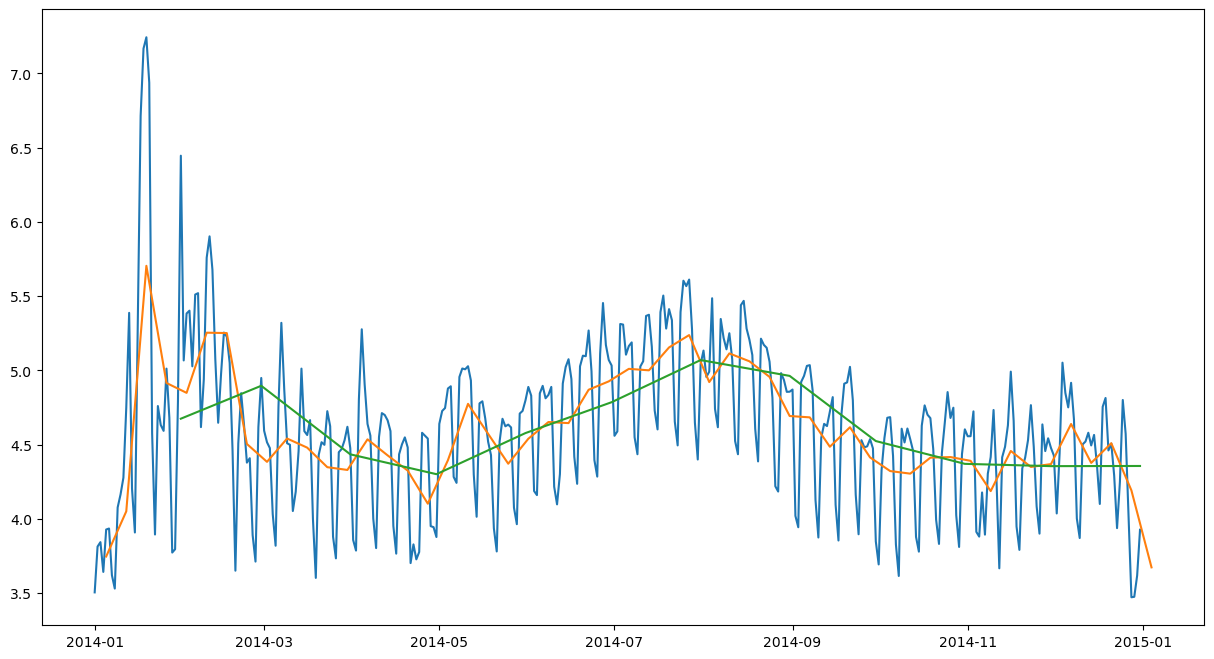

In [55]:
plt.figure(figsize=(15,8))
plt.plot(daily_data['Demand'])
plt.plot(weekly_data['Demand'])
plt.plot(monthly_data['Demand'])

plt.show()

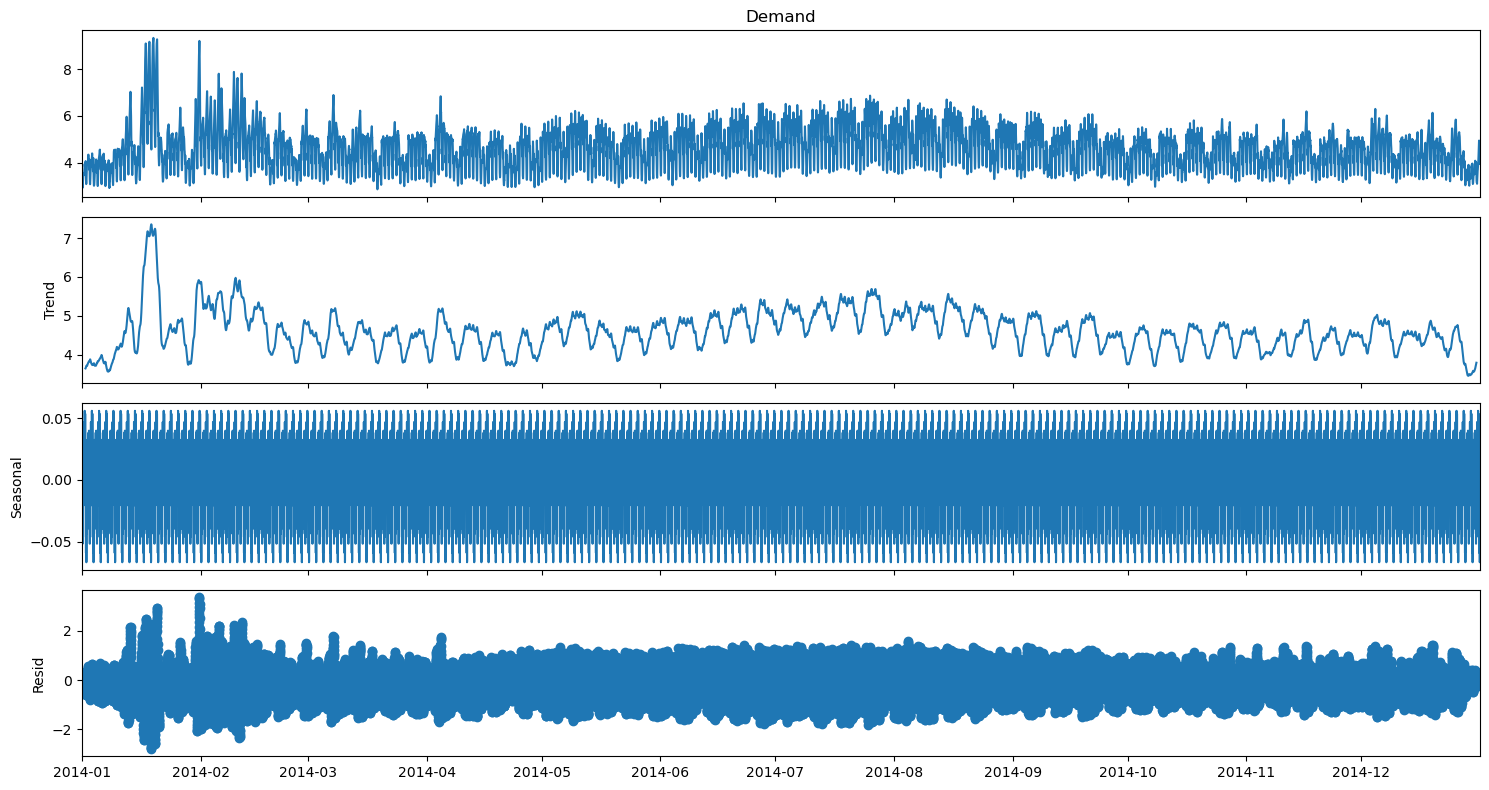

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams.update({'figure.figsize':(15,8)})
results = seasonal_decompose(ts['Demand'], model='additive', period=90)  # assuming daily seasonality
results.plot()
plt.tight_layout()
plt.show()

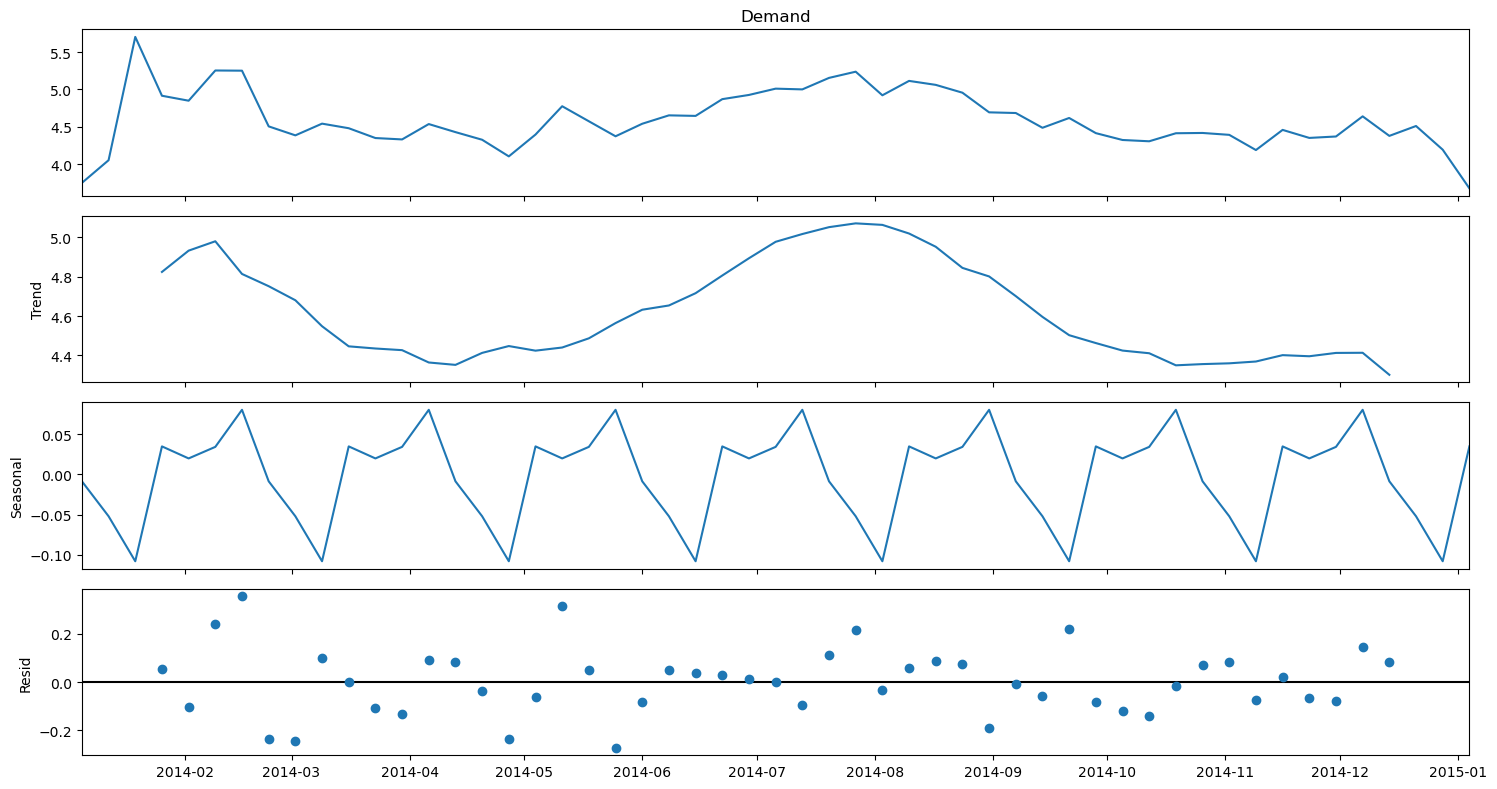

In [57]:
weekly_decomposition = seasonal_decompose(weekly_data['Demand'], model='additive', period=7) 
weekly_decomposition.plot()
plt.show()

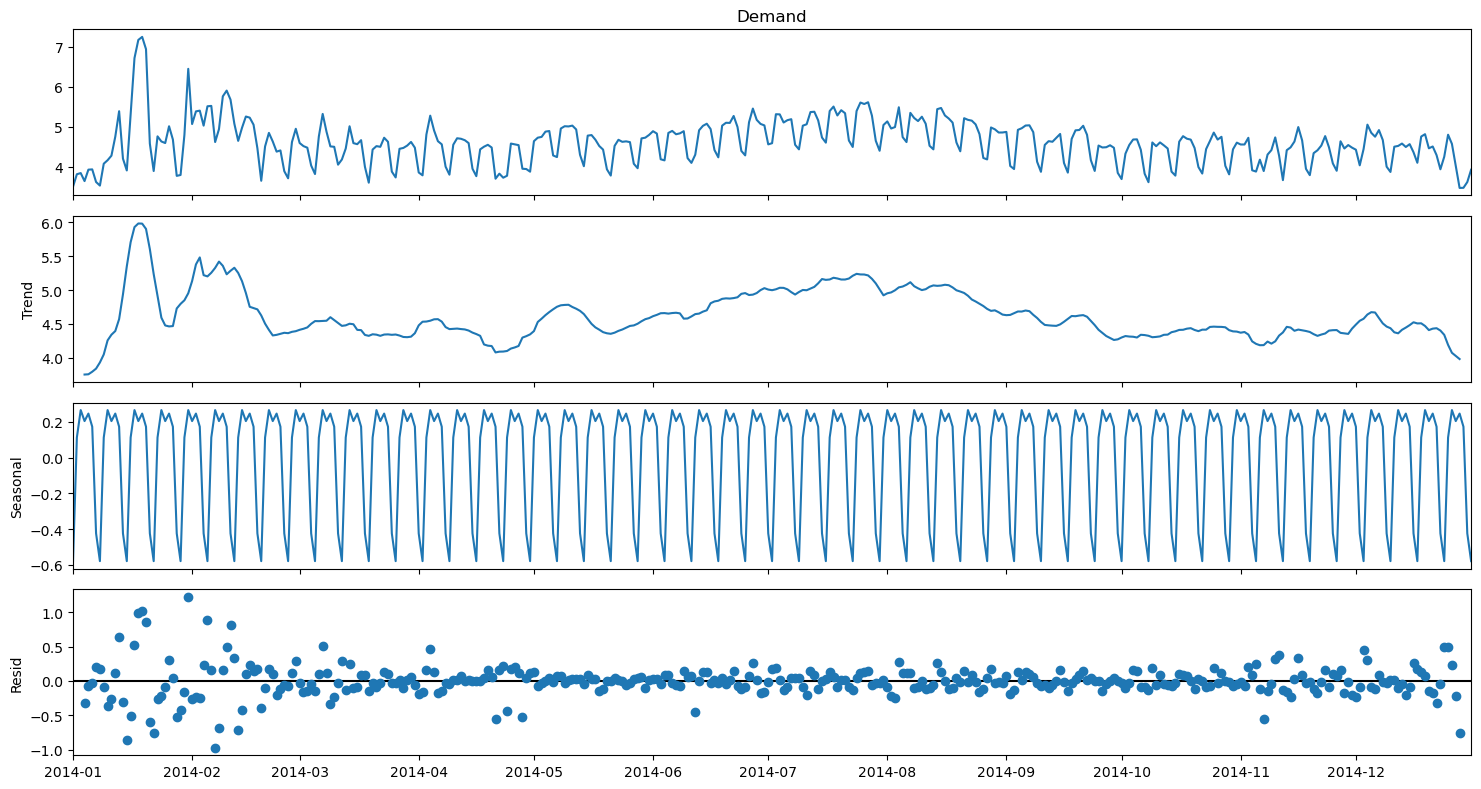

In [58]:
daily_decomposition = seasonal_decompose(daily_data['Demand'], model='additive', period=7) 
daily_decomposition.plot()
plt.plot()
plt.show()

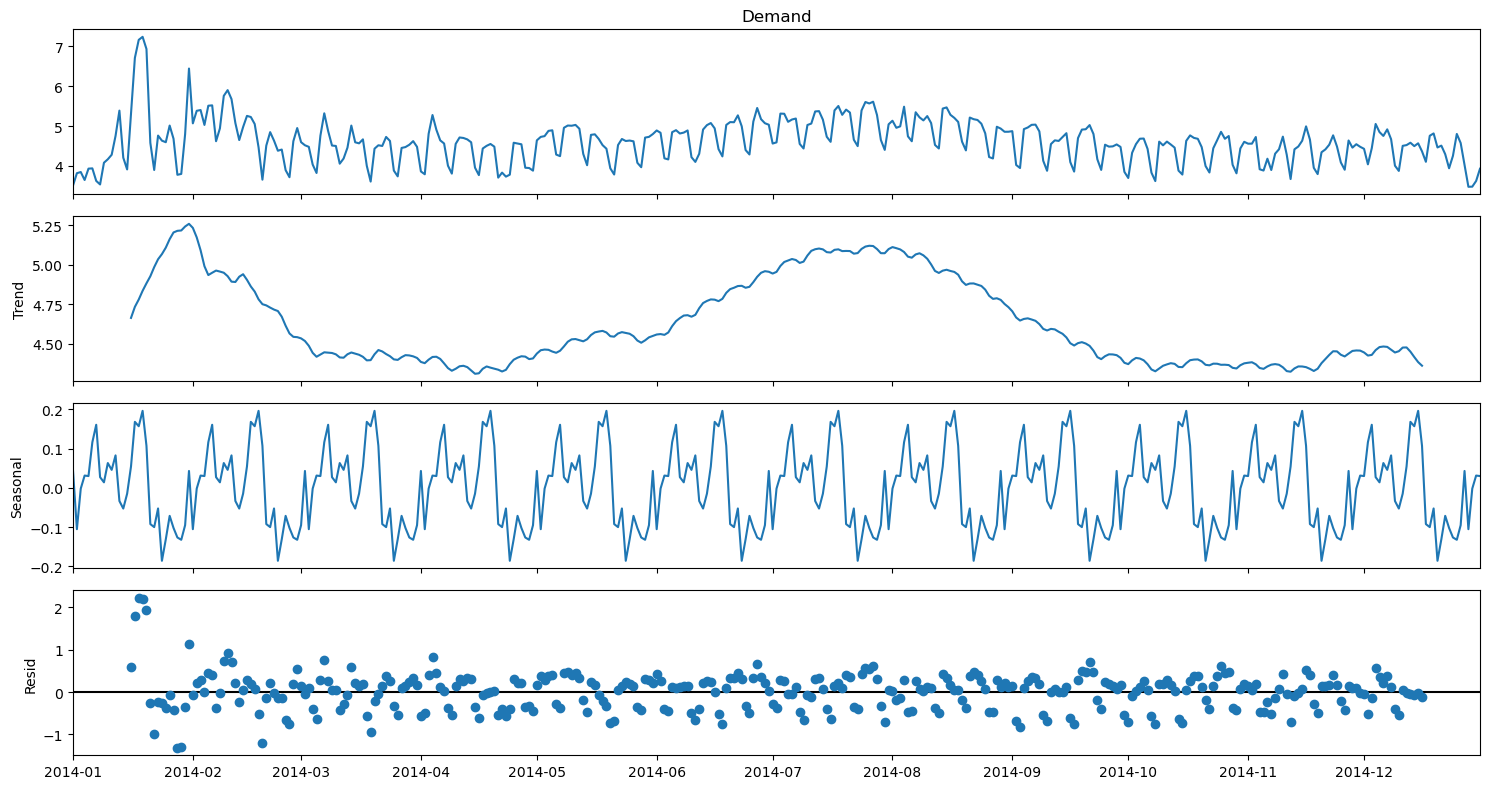

In [59]:
monthly_decomposition = seasonal_decompose(daily_data['Demand'], model='additive', period=30) 
monthly_decomposition.plot()
plt.plot()
plt.show()

5. ACF & PACF(p,d,q)

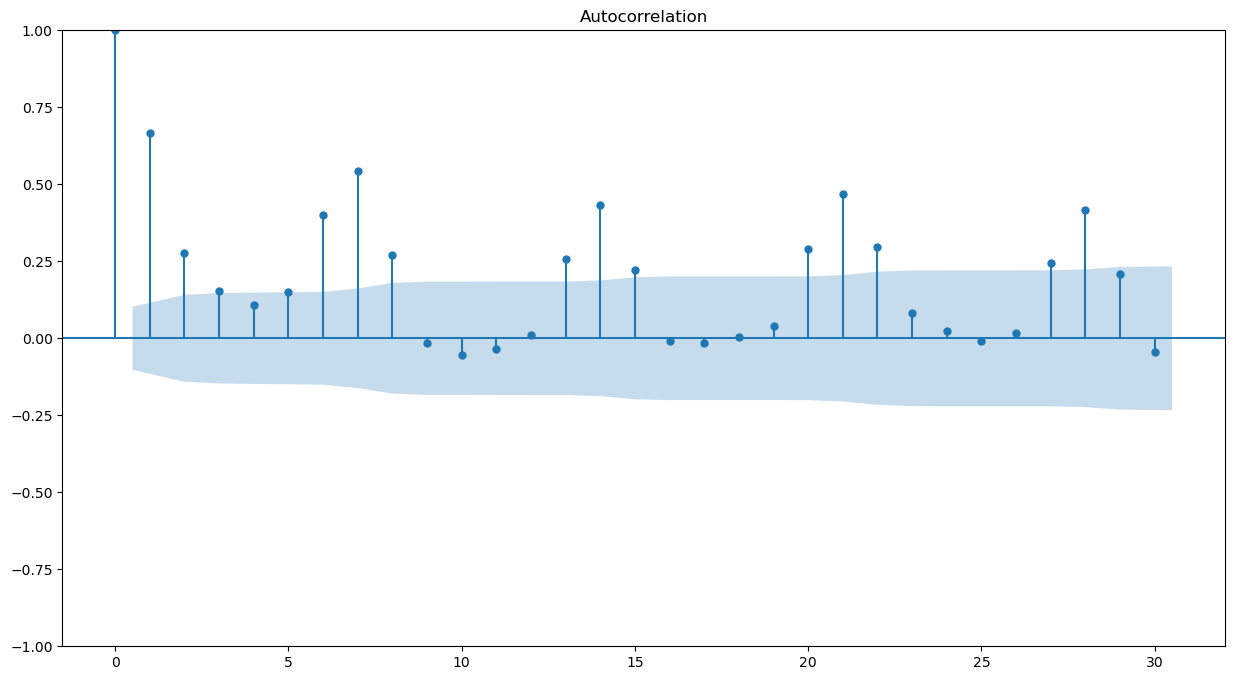

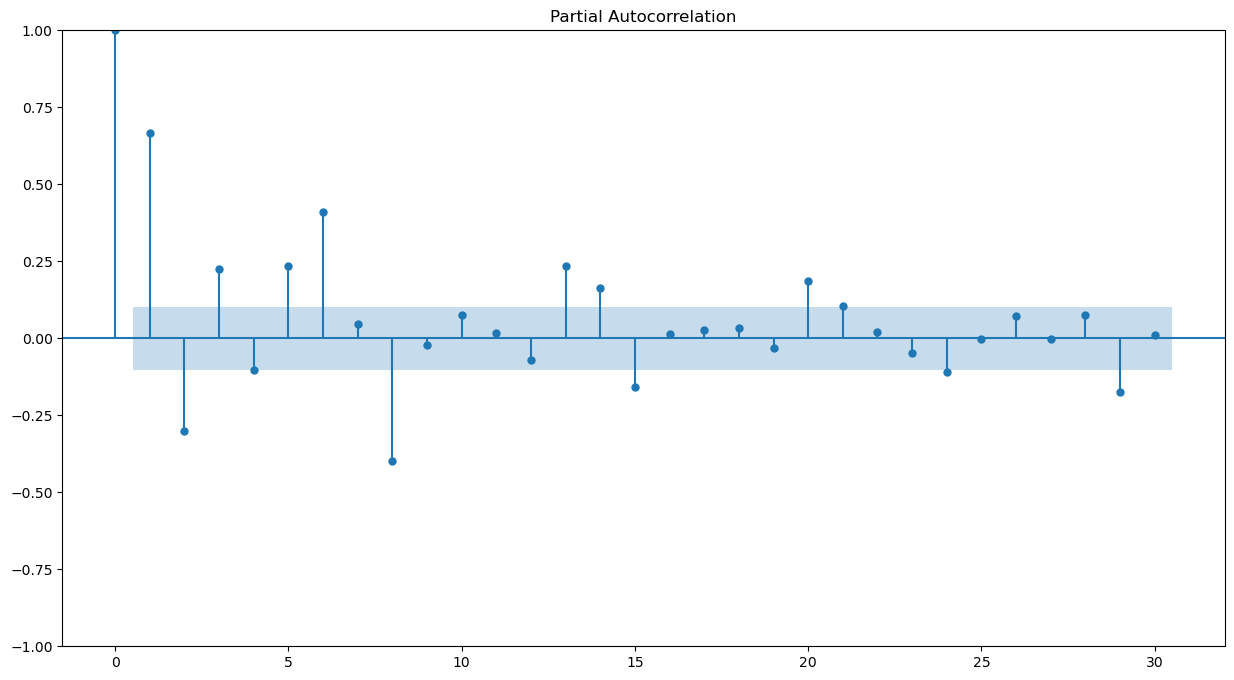

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(daily_data['Demand'],lags=30)
plot_pacf(daily_data['Demand'],lags=30)
plt.show()

6. SARIMA Model

In [61]:
sarima_model=SARIMAX(daily_data['Demand'],order=(2,0,3),seasonal_order=(1,1,1,7))
sarima_model_fit=sarima_model.fit()

In [62]:
sarima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              Demand   No. Observations:                  365
Model:             SARIMAX(2, 0, 3)x(1, 1, [1], 7)   Log Likelihood                 -44.215
Date:                             Tue, 19 Aug 2025   AIC                            104.429
Time:                                     12:16:06   BIC                            135.473
Sample:                                 01-01-2014   HQIC                           116.775
                                      - 12-31-2014                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4834      0.179      8.266      0.000       1.132       1.835
ar.L2         -0.5086      0.159     -3.198      0.001      -0.820      -0.197
ma.L1         -0.5661      0.181     -3.123      0.002      -0.921      -0.211
ma.L2         -0.2535      0.049     -5.211      0.000      -0.349      -0.158
ma.L3          0.0026      0.069      0.037      0.970      -0.133       0.138
ar.S.L7        0.0058      0.039      0.149      0.882      -0.070       0.081
ma.S.L7       -0.9225      0.052    -17.697      0.000      -1.025      -0.820
sigma2         0.0716      0.004     18.622      0.000       0.064       0.079
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               413.68
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                             0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
import itertools
p=[0,1,2,3]
q=[0,1,2]
d=[0]
seasonal_p=seasonal_d=seasonal_q=[0,1]
s=7  #weekly seasonality

non_seasonal_orders=list(itertools.product(p,d,q))
seasonal_orders=list(itertools.product(seasonal_p,seasonal_d,seasonal_q,[s]))

best_aic=float("inf")
best_params=None
best_model=None

for order in non_seasonal_orders:
    for seasonal_order in seasonal_orders:
        try:
            model=SARIMAX(daily_data['Demand'],order=order,seasonal_order=seasonal_order)
            model_fit=model.fit(disp=False)
            current_aic=model_fit.aic
            if  current_aic<best_aic:
                best_aic=current_aic
                best_params=(order,seasonal_order)
                best_model-model_fit
        except Exception as e:
            continue
best_aic,best_params

(np.float64(100.3595245303104), ((2, 0, 2), (0, 1, 1, 7)))

In [65]:
best_sarima_model=SARIMAX(daily_data['Demand'],order=(2, 0, 2),seasonal_order=(0, 1, 1, 7))
best_sarima_fit=best_sarima_model.fit()

In [66]:
best_sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              Demand   No. Observations:                  365
Model:             SARIMAX(2, 0, 2)x(0, 1, [1], 7)   Log Likelihood                 -44.180
Date:                             Tue, 19 Aug 2025   AIC                            100.360
Time:                                     12:28:57   BIC                            123.643
Sample:                                 01-01-2014   HQIC                           109.619
                                      - 12-31-2014                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5099      0.109     13.910      0.000       1.297       1.723
ar.L2         -0.5288      0.094     -5.630      0.000      -0.713      -0.345
ma.L1         -0.5913      0.112     -5.294      0.000      -0.810      -0.372
ma.L2         -0.2524      0.046     -5.429      0.000      -0.343      -0.161
ma.S.L7       -0.9237      0.048    -19.134      0.000      -1.018      -0.829
sigma2         0.0722      0.004     18.684      0.000       0.065       0.080
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               413.45
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

7. Forecast and model evaluation

In [67]:
forecast=best_sarima_fit.get_forecast(steps=60)
ci=forecast.conf_int()

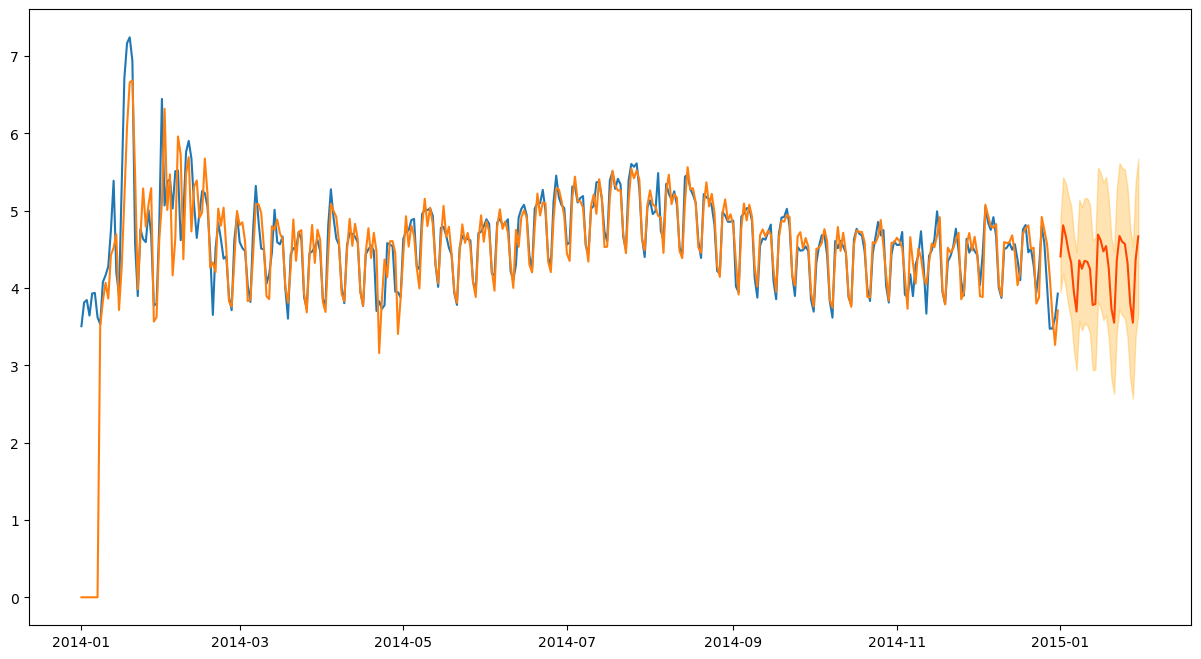

In [75]:
plt.plot(daily_data['Demand'],label='Observed Demand')
plt.plot(best_sarima_fit.fittedvalues,label='Fitted Values')
plt.plot(forecast.predicted_mean,label='Forecast',color='orangered')
plt.fill_between(ci.index,ci.iloc[:,0],ci.iloc[:,1],color='orange',alpha=0.3)

8. Calculate r2....

9. SARIMAX

In [76]:
exog_variable=daily_data[['Temperature']]
best_sarimax_model=SARIMAX(daily_data['Demand'],order=(2,0,2),seasonal_order=(0,1,1,7),exog=exog_variable)
best_sarimax_fit=best_sarimax_model.fit()

In [77]:
best_sarimax_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              Demand   No. Observations:                  365
Model:             SARIMAX(2, 0, 2)x(0, 1, [1], 7)   Log Likelihood                   0.896
Date:                             Tue, 19 Aug 2025   AIC                             12.209
Time:                                     12:45:29   BIC                             39.373
Sample:                                 01-01-2014   HQIC                            23.012
                                      - 12-31-2014                                         
Covariance Type:                               opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Temperature     0.0543      0.004     13.800      0.000       0.047       0.062
ar.L1           1.5311      0.110     13.939      0.000       1.316       1.746
ar.L2          -0.5379      0.105     -5.099      0.000      -0.745      -0.331
ma.L1          -0.6464      0.115     -5.600      0.000      -0.873      -0.420
ma.L2          -0.2034      0.060     -3.387      0.001      -0.321      -0.086
ma.S.L7        -0.9365      0.036    -26.280      0.000      -1.006      -0.867
sigma2          0.0562      0.003     18.103      0.000       0.050       0.062
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               165.51
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
forecast=best_sarimax_fit.get_forecast(steps=30,exog=exog_variable[-30:])
ci=forecast.conf_int()

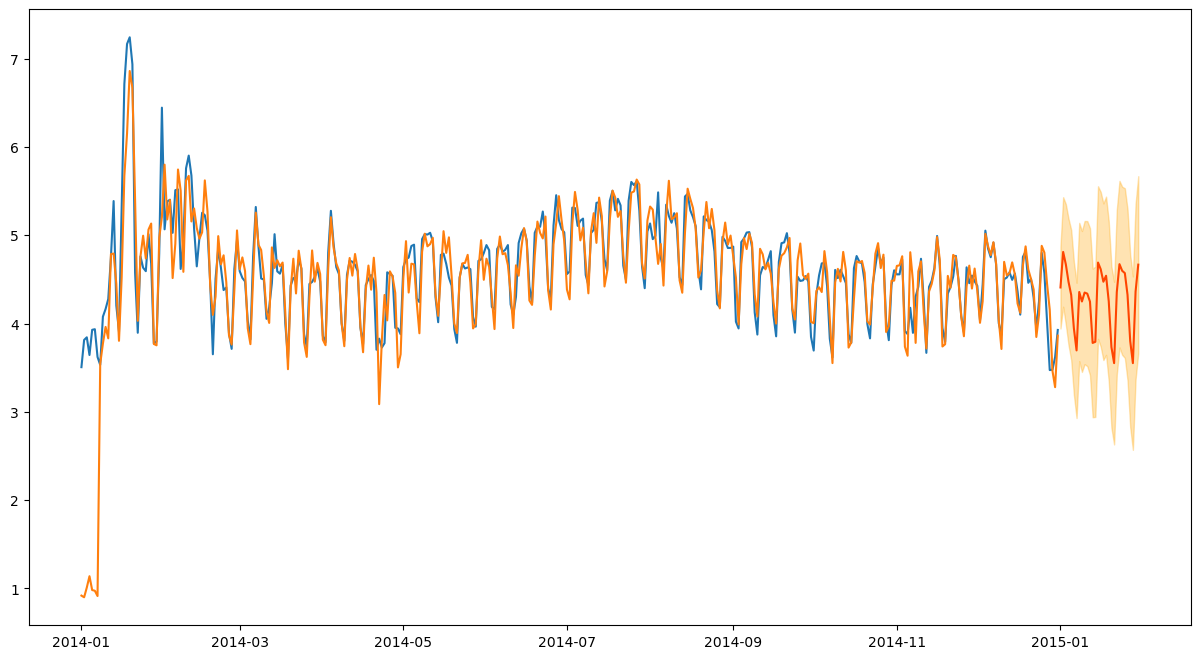

In [79]:
plt.plot(daily_data['Demand'],label='Observed Demand')
plt.plot(best_sarimax_fit.fittedvalues,label='Fitted Values')
plt.plot(forecast.predicted_mean,label='Forecast',color='orangered')
plt.fill_between(ci.index,ci.iloc[:,0],ci.iloc[:,1],color='orange',alpha=0.3)